In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import optimize, integrate
import pandas
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/')
import functions

In [3]:
def scaledTheory(t,E):
    scale=functions.composite(E_mu=E)/functions.theory_supressed(E_mu=E,theta=0)
    return scale*functions.theory_supressed(theta=t,E_mu=E)*numpy.sin(t)

In [3]:
integrate.quad(scaledTheory, a=0, b=numpy.pi/2, args=(1,))

(14.250438717284393, 2.658225867743725e-08)

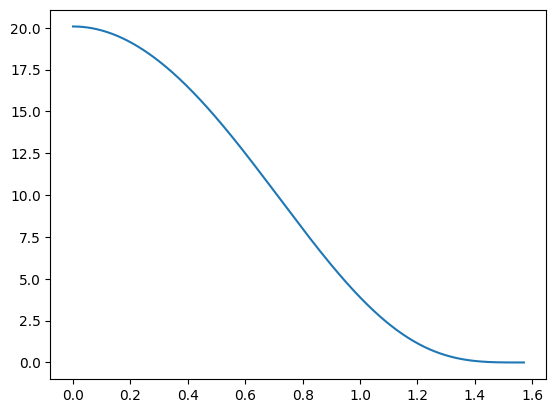

In [4]:
x=numpy.linspace(0,numpy.pi/2,10000)
plt.plot(x,scaledTheory(x,1), label='E=1GeV')

In [4]:
def integrated_theory(E_mu):
    return integrate.quad(scaledTheory, a=0, b=numpy.pi/2,args=(E_mu,))[0]
f=numpy.vectorize(integrated_theory)

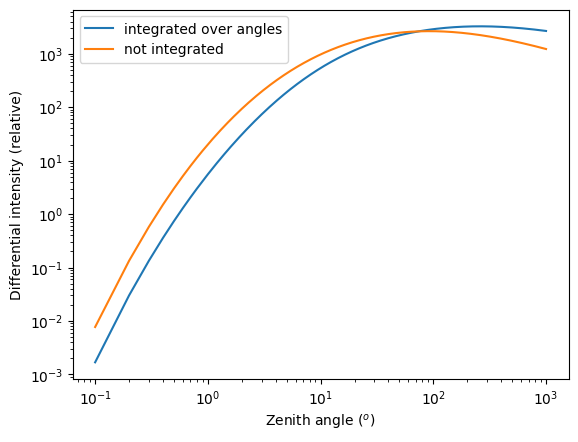

In [7]:
x=numpy.linspace(0.1,1000,10000)
# y=[]
# for i in x:
#     temp=integrate.quad(scaledTheory, a=0, b=numpy.pi/2,args=(i,))
#     y.append(temp[0])
plt.plot(x,f(x)*x**3, label='integrated over angles')
plt.plot(x, [functions.composite(E_mu=x[i])*x[i]**3 for i in range(len(x))], label='not integrated')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Differential intensity (relative)')
plt.xlabel('Zenith angle ($^o$)')
plt.legend()

In [7]:
def poly(x,fit):
    tot=0
    for i in range(4):
        tot+=fit[i]*x**i
    return tot

In [22]:
x=numpy.linspace(0.1,18000,100000)
# y_theo=[functions.integrated_theory(x[i]) for i in range((len(x)))]
y_bf=[functions.integrated_fast(x[i]) for i in range((len(x)))]

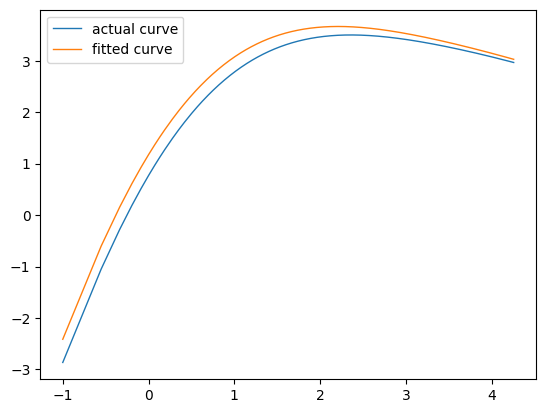

In [18]:
plt.plot(numpy.log10(x), g(numpy.log10(x)), label='actual curve', linewidth=1)
plt.plot(numpy.log10(x), numpy.log10(y_bf*x**3), label='fitted curve', linewidth=1)
# plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [27]:
numpy.sum(x**-2*10**g(numpy.log10(x)))/numpy.sum(10**g(numpy.log10(x))/x**3)
# numpy.sum(x*y_bf)/numpy.sum(y_bf)

7.800446728085764

In [9]:
# f=numpy.vectorize(lambda x: functions.integrated_theory(x))
x=numpy.linspace(0.1,1000000,1000000)
y=f(x)
fit=numpy.polyfit(numpy.log10(x),numpy.log10(y*x**3),deg=6,full=True)

In [10]:
g=numpy.poly1d(fit[0])

In [ ]:
fit #order 3

(array([ 0.0756395 , -0.82856965,  2.59415194,  1.17375956]),
 array([0.010355]),
 4,
 array([1.98884839, 0.20945295, 0.02437029, 0.00419969]),
 2.220446049250313e-12)

In [ ]:
fit #order 4

(array([ 2.95900133e-05,  7.53793384e-02, -8.27863809e-01,  2.59366576e+00,
         1.17351311e+00]),
 array([0.0103492]),
 5,
 array([2.21958550e+00, 2.68570802e-01, 3.55971198e-02, 6.39237333e-03,
        1.38555940e-03]),
 2.220446049250313e-12)

In [ ]:
fit #order 5

(array([ 2.96583688e-04, -3.01524298e-03,  8.57045308e-02, -8.38511884e-01,
         2.58739340e+00,  1.18428195e+00]),
 array([0.00955867]),
 6,
 array([2.42722649e+00, 3.25936148e-01, 4.74808660e-02, 8.81396148e-03,
        2.22880360e-03, 3.45352566e-04]),
 2.220446049250313e-12)

In [11]:
fit #order 6

(array([ 4.05232241e-04, -7.30338740e-03,  4.05996475e-02,  1.06852527e-03,
        -8.53022670e-01,  2.82746788e+00,  7.69578851e-01]),
 array([3.00915022]),
 7,
 array([2.62975028e+00, 2.88718327e-01, 3.22345934e-02, 3.97061561e-03,
        5.79243684e-04, 1.06426441e-04, 1.35247238e-05]),
 2.220446049250313e-10)

In [10]:
fit[0]

array([ 1.64600469e-04, -2.15109323e-03,  9.82817214e-03,  5.89195321e-02,
       -8.28428934e-01,  2.61671857e+00,  1.16277379e+00])